In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
train = pd.read_csv(r"C:\dataset\train_hiring.csv")
train

,?experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
train.isnull().sum()

?experience                   2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [4]:
train['?experience'] = train['?experience'].fillna(0)
train.isnull().sum()

?experience                   0
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [5]:
list(train['?experience'].astype(str)) 

['0', '0', 'five', 'two', 'seven', 'three', 'ten', 'eleven']

In [6]:
from word2number import w2n

exper = list(train['?experience'].astype(str)) 
def word2number(a):
    f=[]
    for i in range(len(a)):
        s=w2n.word_to_num(a[i])
        f.append(s)
    return f

numbers = word2number(exper)
numbers

[0, 0, 5, 2, 7, 3, 10, 11]

In [7]:
train['?experience'] = pd.Series(numbers)
type(train['?experience'][0])

numpy.int64

In [8]:
train.isnull().sum()


?experience                   0
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [9]:
train['test_score(out of 10)'] = train['test_score(out of 10)'].fillna(train['test_score(out of 10)'].median())
train['test_score(out of 10)']

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [10]:
train.isnull().sum()

?experience                   0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [11]:
train

,?experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


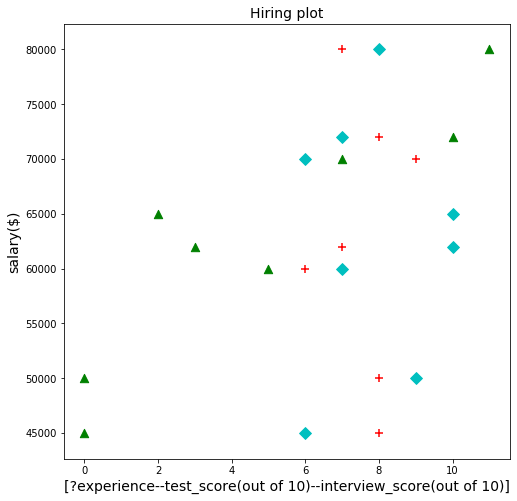

In [12]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel('[?experience--test_score(out of 10)--interview_score(out of 10)]', fontsize=14)
plt.ylabel('salary($)', fontsize=14)
plt.title('Hiring plot', fontsize=14)
plt.scatter(train['?experience'], train['salary($)'], marker='^', s=70, c='g')
plt.scatter(train['test_score(out of 10)'], train['salary($)'], marker='+', s=70, c='r')
plt.scatter(train['interview_score(out of 10)'], train['salary($)'], marker='D', s=70, c='c')



In [13]:
reg = linear_model.LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg.fit(train[['?experience','test_score(out of 10)','interview_score(out of 10)']], train[['salary($)']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
reg.predict([[2,9,6]])

array([[53205.96797671]])

In [16]:
reg.predict([[12,10,10]])

array([[92002.18340611]])

In [17]:
reg.predict([[0,10,8]])

array([[53836.24454148]])